In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation,Lambda,Flatten
from keras.optimizers import Adam , RMSprop
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


test.csv
train.csv



In [2]:
train=pd.read_csv("../input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("../input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train=(train.ix[:,1:].values).astype('float32')
y_train=train.ix[:,0].values.astype('int32')

x_test=test.values.astype('float32')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [5]:
x_train.shape

(42000, 784)

In [6]:
y_train.shape

(42000,)

**Previewing image**

In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28)

In [8]:
x_train.shape

(42000, 28, 28)

Number is 7


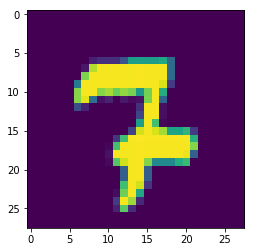

In [9]:
#change index to view other images
index=678
plt.imshow(x_train[index])
print('Number is',y_train[index])

**Better to change the channe to gray as there is no need for these color pixels.
We will add another dimesion 1 for gray chanee.
P.S - 3 is for RGB channel**

In [10]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [11]:
x_train.shape,x_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

**Preprocessing**

In [12]:
#One Hot Encoding 
#I guess everybody knows this otherwise google

from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)

In [13]:
y_train.shape

(42000, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


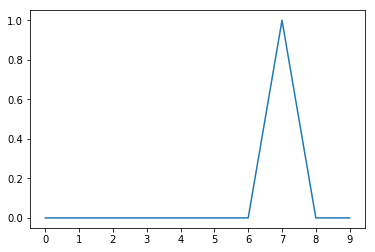

In [14]:
#same as above to verify as if it correct
print(y_train[index])
plt.plot(y_train[index])
plt.xticks(range(10))
plt.show()

In [15]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [16]:
x_train.reshape

<function ndarray.reshape>

**NN**

In [17]:
np.random.seed(34)

In [18]:
model=Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


In [19]:
#most useful function for a newbie **sobs**
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer=RMSprop(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
from keras.preprocessing import image
gen=image.ImageDataGenerator()

In [22]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.10,random_state=34)
batches=gen.flow(X_train,Y_train,batch_size=64)
val_batches=gen.flow(X_val,Y_val,batch_size=64)

In [23]:
cache=model.fit_generator(batches,batches.n,nb_epoch=1,validation_data=val_batches,nb_val_samples=val_batches.n)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, validation_data=<keras.pre..., epochs=1, validation_steps=4200)`
  """Entry point for launching an IPython kernel.


Epoch 1/1
37800/37800 [==============================] - 94s 2ms/step - loss: 0.2392 - acc: 0.9336 - val_loss: 0.3446 - val_acc: 0.9102


In [24]:
cache.history

{'acc': [0.93361360387626546],
 'loss': [0.23917538815835543],
 'val_acc': [0.91024288410685317],
 'val_loss': [0.344636433238173]}

In [25]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, Y_train, batch_size=64)
history=model.fit_generator(batches, batches.n, nb_epoch=1)

Epoch 1/1
   77/37800 [..............................] - ETA: 1:17 - loss: 0.2199 - acc: 0.9405

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, epochs=1)`
  after removing the cwd from sys.path.


37800/37800 [==============================] - 83s 2ms/step - loss: 0.2150 - acc: 0.9413


In [26]:
history.history

{'acc': [0.94125775956106561], 'loss': [0.21498276841166902]}

In [27]:
preds=model.predict_classes(x_test,verbose=0)

In [28]:
preds[0:5]

array([2, 0, 9, 7, 3])

In [29]:
subs=pd.DataFrame({"ImageId":list(range(1,len(preds)+1)),"Label":preds})
subs.to_csv("sub1.csv",index=False,header=True)